In [1]:
import numpy as np
import struct
import matplotlib.pyplot as plt

# 训练集文件
train_images_idx3_ubyte_file = 'D:/dataset/ml_data/MNIST/train-images.idx3-ubyte'
# 训练集标签文件
train_labels_idx1_ubyte_file = 'D:/dataset/ml_data/MNIST/train-labels.idx1-ubyte'

# 测试集文件
test_images_idx3_ubyte_file = 'D:/dataset/ml_data/MNIST/t10k-images.idx3-ubyte'
# 测试集标签文件
test_labels_idx1_ubyte_file = 'D:/dataset/ml_data/MNIST/t10k-labels.idx1-ubyte'


def decode_idx3_ubyte(idx3_ubyte_file):
    """
    解析idx3文件的通用函数
    :param idx3_ubyte_file: idx3文件路径
    :return: 数据集
    """
    # 读取二进制数据
    bin_data = open(idx3_ubyte_file, 'rb').read()

    # 解析文件头信息，依次为魔数、图片数量、每张图片高、每张图片宽
    offset = 0
    fmt_header = '>iiii' #因为数据结构中前4行的数据类型都是32位整型，所以采用i格式，但我们需要读取前4行数据，所以需要4个i。我们后面会看到标签集中，只使用2个ii。
    magic_number, num_images, num_rows, num_cols = struct.unpack_from(fmt_header, bin_data, offset)
    print('魔数:%d, 图片数量: %d张, 图片大小: %d*%d' % (magic_number, num_images, num_rows, num_cols))

    # 解析数据集
    image_size = num_rows * num_cols
    offset += struct.calcsize(fmt_header)  #获得数据在缓存中的指针位置，从前面介绍的数据结构可以看出，读取了前4行之后，指针位置（即偏移位置offset）指向0016。
    print(offset)
    fmt_image = '>' + str(image_size) + 'B'  #图像数据像素值的类型为unsigned char型，对应的format格式为B。这里还有加上图像大小784，是为了读取784个B格式数据，如果没有则只会读取一个值（即一副图像中的一个像素值）
    print(fmt_image,offset,struct.calcsize(fmt_image))
    images = np.empty((num_images, num_rows, num_cols))
    #plt.figure()
    for i in range(num_images):
        if (i + 1) % 10000 == 0:
            print('已解析 %d' % (i + 1) + '张')
            print(offset)
        images[i] = np.array(struct.unpack_from(fmt_image, bin_data, offset)).reshape((num_rows, num_cols))
        #print(images[i])
        offset += struct.calcsize(fmt_image)
#        plt.imshow(images[i],'gray')
#        plt.pause(0.00001)
#        plt.show()
    #plt.show()

    return images


def decode_idx1_ubyte(idx1_ubyte_file):
    """
    解析idx1文件的通用函数
    :param idx1_ubyte_file: idx1文件路径
    :return: 数据集
    """
    # 读取二进制数据
    bin_data = open(idx1_ubyte_file, 'rb').read()

    # 解析文件头信息，依次为魔数和标签数
    offset = 0
    fmt_header = '>ii'
    magic_number, num_images = struct.unpack_from(fmt_header, bin_data, offset)
    print('魔数:%d, 图片数量: %d张' % (magic_number, num_images))

    # 解析数据集
    offset += struct.calcsize(fmt_header)
    fmt_image = '>B'
    labels = np.empty(num_images)
    for i in range(num_images):
        if (i + 1) % 10000 == 0:
            print ('已解析 %d' % (i + 1) + '张')
        labels[i] = struct.unpack_from(fmt_image, bin_data, offset)[0]
        offset += struct.calcsize(fmt_image)
    return labels


def load_train_images(idx_ubyte_file=train_images_idx3_ubyte_file):
    """
    TRAINING SET IMAGE FILE (train-images-idx3-ubyte):
    [offset] [type]          [value]          [description]
    0000     32 bit integer  0x00000803(2051) magic number
    0004     32 bit integer  60000            number of images
    0008     32 bit integer  28               number of rows
    0012     32 bit integer  28               number of columns
    0016     unsigned byte   ??               pixel
    0017     unsigned byte   ??               pixel
    ........
    xxxx     unsigned byte   ??               pixel
    Pixels are organized row-wise. Pixel values are 0 to 255. 0 means background (white), 255 means foreground (black).

    :param idx_ubyte_file: idx文件路径
    :return: n*row*col维np.array对象，n为图片数量
    """
    return decode_idx3_ubyte(idx_ubyte_file)


def load_train_labels(idx_ubyte_file=train_labels_idx1_ubyte_file):
    """
    TRAINING SET LABEL FILE (train-labels-idx1-ubyte):
    [offset] [type]          [value]          [description]
    0000     32 bit integer  0x00000801(2049) magic number (MSB first)
    0004     32 bit integer  60000            number of items
    0008     unsigned byte   ??               label
    0009     unsigned byte   ??               label
    ........
    xxxx     unsigned byte   ??               label
    The labels values are 0 to 9.

    :param idx_ubyte_file: idx文件路径
    :return: n*1维np.array对象，n为图片数量
    """
    return decode_idx1_ubyte(idx_ubyte_file)


def load_test_images(idx_ubyte_file=test_images_idx3_ubyte_file):
    """
    TEST SET IMAGE FILE (t10k-images-idx3-ubyte):
    [offset] [type]          [value]          [description]
    0000     32 bit integer  0x00000803(2051) magic number
    0004     32 bit integer  10000            number of images
    0008     32 bit integer  28               number of rows
    0012     32 bit integer  28               number of columns
    0016     unsigned byte   ??               pixel
    0017     unsigned byte   ??               pixel
    ........
    xxxx     unsigned byte   ??               pixel
    Pixels are organized row-wise. Pixel values are 0 to 255. 0 means background (white), 255 means foreground (black).

    :param idx_ubyte_file: idx文件路径
    :return: n*row*col维np.array对象，n为图片数量
    """
    return decode_idx3_ubyte(idx_ubyte_file)


def load_test_labels(idx_ubyte_file=test_labels_idx1_ubyte_file):
    """
    TEST SET LABEL FILE (t10k-labels-idx1-ubyte):
    [offset] [type]          [value]          [description]
    0000     32 bit integer  0x00000801(2049) magic number (MSB first)
    0004     32 bit integer  10000            number of items
    0008     unsigned byte   ??               label
    0009     unsigned byte   ??               label
    ........
    xxxx     unsigned byte   ??               label
    The labels values are 0 to 9.

    :param idx_ubyte_file: idx文件路径
    :return: n*1维np.array对象，n为图片数量
    """
    return decode_idx1_ubyte(idx_ubyte_file)


魔数:2051, 图片数量: 60000张, 图片大小: 28*28
16
>784B 16 784
已解析 10000张
7839232
已解析 20000张
15679232
已解析 30000张
23519232
已解析 40000张
31359232
已解析 50000张
39199232
已解析 60000张
47039232
魔数:2049, 图片数量: 60000张
已解析 10000张
已解析 20000张
已解析 30000张
已解析 40000张
已解析 50000张
已解析 60000张
魔数:2051, 图片数量: 10000张, 图片大小: 28*28
16
>784B 16 784
已解析 10000张
7839232
魔数:2049, 图片数量: 10000张
已解析 10000张
5.0


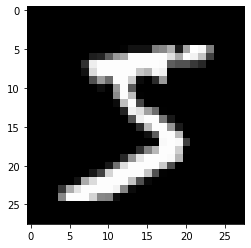

0.0


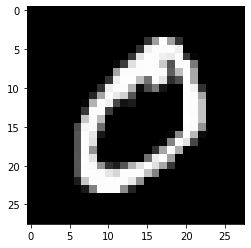

4.0


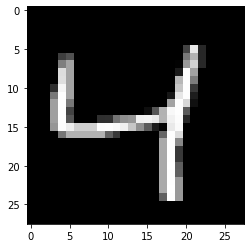

1.0


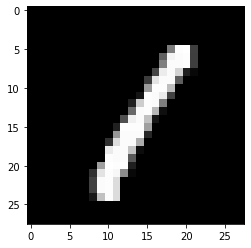

9.0


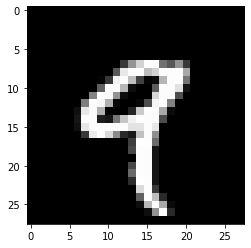

2.0


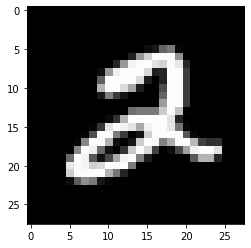

1.0


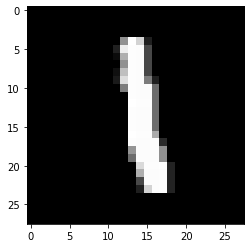

3.0


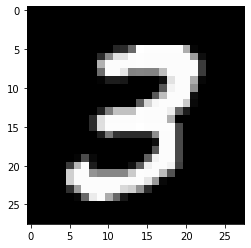

1.0


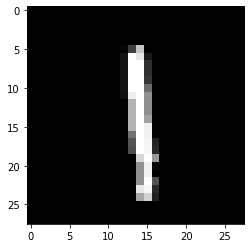

4.0


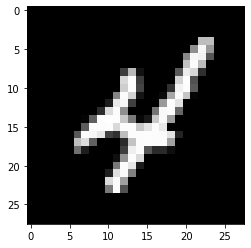

done


In [2]:

if __name__ == '__main__':
    train_images = load_train_images()
    train_labels = load_train_labels()
    test_images = load_test_images()
    test_labels = load_test_labels()

    # 查看前十个数据及其标签以读取是否正确
    for i in range(10):
        print(train_labels[i])
        plt.imshow(train_images[i], cmap='gray')
        plt.pause(0.000001)
        plt.show()
    print('done')

reference: https://blog.csdn.net/panrenlong/article/details/81736754

In [3]:
def softmax(x):
    """
        return exp(x) / sum(exp(x))
        shape of x : (10,60000)or(10,10000)
        shape of total : (60000,)or(10000,)
        index_nan : (60000,2),235678
    """
    x_exp = np.exp(x-np.max(x,axis = 0))
    total = np.sum(x_exp,axis=0) # 列
    return x_exp / total
    

# 线性模型
def linear_model(w,b,x):
    """
        w:(784, 10)
        x:(10,60000)
        return softmax(x * w + b)
    """
    return softmax(np.dot(w.T,x)+b)
# 交叉熵
def cross_entropy(y, y_hat):
    """
        y,l=y:data l:after linear model
        y: 10*10000(6)
        y_hat:10*10000(6)
        return - sum(log(y_hat^y))
    
    """
    return - np.sum(y*np.log(y_hat+np.exp(-7)))

# 梯度下降
def sgd(w, b,x, y, alpha=0.01):
    """
        para: 参数[w, b]
        alpha: 学习率
        batch: 批次大小
        w ： (784,10)
        y :  (10, 60000)
        x :  (784,60000)
        lm:  (10, 60000)
        para -= para.grad * alpha / batch
    """
    batch_size = x.shape[1]
    lm = linear_model(w,b,x)
    dw = np.dot((y - lm),x.T)
    db = np.sum(y - lm, axis = 1,keepdims = True) # aaa
    w_o = w + alpha*dw.T/batch_size
    b_o = b + alpha*db/batch_size
    return w_o,b_o

def get_minibatch(epoch,batch_size,x,y):
    rounds = 60000 / batch_size
    index1 = int((epoch % rounds) * batch_size)
    index2 = int((epoch % rounds + 1) * batch_size)
    return x[:,index1 :index2], y[:,index1:index2]


In [4]:
import random
import matplotlib.pyplot as plt 
# 画图
tstl = []
trnl = []
tacc = []
# 初始化数据
x = train_images.reshape(60000,784).T / 255.0
y = np.zeros((10,60000))
for index in range(10):
    y[index,np.where(train_labels == index)] = 1

# y = train_labels.reshape(1,60000)

x_t = test_images.reshape(10000,784).T / 255.0
y_t = np.zeros((10,10000))
for index in range(10):
    y_t[index,np.where(test_labels == index)] = 1

# y_t = test_labels.reshape(1,10000)
epochs = 50000

w_dat = np.random.randint(1,100,size=(784,10))
w = w_dat / w_dat.sum(axis=0)
b = np.zeros((10,1))
batch_size = 6000
batch_size_t = 10000

# 训练模型
for epoch in range(epochs):
    # 获得用于训练的minibatch
    minibatch_x,minibatch_y = get_minibatch(epoch,batch_size,x,y)
    # 初始化训练损失
    l = linear_model(w,b, minibatch_x)
    loss = cross_entropy(minibatch_y, l)
    # 累加每个元素的损失
    train_loss = loss / batch_size
    trnl.append(train_loss)
        
    # 梯度下降
    w,b = sgd(w,b,minibatch_x, minibatch_y)

    # 测试
    # 注意：测试集不需要梯度，也不需要梯度清零、反向传播、梯度下降
    l_t = linear_model(w,b, x_t)
    loss_t = cross_entropy(y_t, l_t)
    test_loss = loss_t / batch_size_t
    tstl.append(test_loss)
        
    # 累加计算正确的个数的平均值
    acc = (np.argmax(l_t,axis=0) == np.argmax(y_t,axis=0)).sum()
    tacc.append(acc / batch_size_t)

    # 每训练三次就输出一次性能
    if epoch % 10 == 0:
        train_y = linear_model(w,b, x)
        train_acc = (np.argmax(train_y,axis=0) == np.argmax(y,axis=0)).sum() / 60000
       # 输出
        print(f"\nTurn: {epoch // 10 + 1} -->\n"
            f"Train Loss: {train_loss / batch_size}\n"
            f"Test Loss: {test_loss / batch_size_t}\n"
            f"Train Accuracy: {train_acc}\n"
            f"Test Accuracy: {acc / batch_size_t}\n")

plt.figure(1)
plt.plot(tstl,color='b')#画在图1上
plt.plot(trnl,color='r')
plt.savefig('linear_loss.png')

plt.figure(2)
plt.plot()#画在图2上，且不在一个窗口              
plt.plot(tacc,color='b')
plt.savefig('linear_acc.png')
print("Over")



Turn: 1 -->
Train Loss: 0.00038213024165610686
Test Loss: 0.0002281491291134246
Train Accuracy: 0.5194666666666666
Test Accuracy: 0.5294


Turn: 2 -->
Train Loss: 0.0003647215061794668
Test Loss: 0.00021775894945783977
Train Accuracy: 0.6966
Test Accuracy: 0.6976


Turn: 3 -->
Train Loss: 0.0003487165857631781
Test Loss: 0.00020820515287981345
Train Accuracy: 0.71995
Test Accuracy: 0.724


Turn: 4 -->
Train Loss: 0.00033390389743139935
Test Loss: 0.0001993623325755619
Train Accuracy: 0.7327
Test Accuracy: 0.7389


Turn: 5 -->
Train Loss: 0.0003201645816240998
Test Loss: 0.0001911590494513272
Train Accuracy: 0.7433166666666666
Test Accuracy: 0.7499


Turn: 6 -->
Train Loss: 0.00030741545029796223
Test Loss: 0.00018354512093627745
Train Accuracy: 0.7505833333333334
Test Accuracy: 0.7569


Turn: 7 -->
Train Loss: 0.0002955867961332348
Test Loss: 0.00017647868365020932
Train Accuracy: 0.7569666666666667
Test Accuracy: 0.7645


Turn: 8 -->
Train Loss: 0.00028461427386721323
Test Loss: 0.00